# Мобильные приложения — Выделение групп пользователей на основе поведения

# Цель проекта
Закрепление навыков предобработки предоставленных данных, исследовательского и статистического анализа данных, визуализации, когортного анализа, создание презентации и дашборда.

# Задачи проекта

1. **Выделить группы пользователей, которые различаются по метрикам:**
 - retention rate,
 - время, проведённое в приложении, 
 - частота действий, 
 - конверсия в целевое действие — просмотр контактов.

2. **Провести исследовательский анализ данных**
3. **Сегментировать пользователей на основе действий**
4. **Проверить статистические гипотезы**
    1. *Некоторые пользователи установили приложение по ссылке из `yandex`, другие — из `google`. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.*
    2. *Сформулируйте собственную гипотезу. Дополните её нулевой и альтернативной гипотезами. Проведите статистический тест.*


# Описание данных
Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений. В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:
- `event.time` — время совершения
- `event.name` — название события
- `user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:
- `userId` — идентификатор пользователя
- `source` — источник, с которого пользователь установил приложение

Расшифровки событий:
- `advert_open` — открытие карточки объявления
- `photos_show` — просмотр фотографий в объявлении
- `tips_show` — пользователь увидел рекомендованные объявления
- `tips_click` — пользователь кликнул по рекомендованному объявлению
- `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
- `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
- `map` — пользователь открыл карту размещенных объявлений
- `search_1` — `search_7` — разные события, связанные с поиском по сайту
- `favorites_add` — добавление объявления в избранное

# Оглавление:


[**1. Загрузка данных и изучение общей информации**](#first-bullet)
 - Открыть файлы с данными и изучить общую информацию
 - Проверить типы данных в столбцах;
 - При необходимости переименовать столбцы;
 - Проверить данные на пропуски, обработать пропуски при необходимости, либо аргументировать, если избавляться от пропусков не буду;
 - Проверить и обработать данные на дубликаты;
 - Написать выводы по разделу.
 
[**2. Исследовательский анализ данных**](#second-bullet)
- Объединить датасеты по id пользователя;
- Рассчитать общий Retention Rate пользователей приложения;
- Посмотреть, сколько всего пользователей используют приложение;
- Посмотреть общую активность пользователей, рассчитать метрики DAU, WAU
- Исследовать, сколько в среднем времени проводят пользователи в приложении;
- Написать выводы по разделу.

[**3. Сегментация пользователей на группы**](#third-bullet)
- Разбить пользователей на группы
- Провести когортный анализ
- Рассчитать Retention Rate
- Построить график распределения пользователей по времени, проведенному в приложении
- Посчитать конверсию в целевое действие - просмотр контактов для пользователей,
- Построить график распределения конверсий;
- Написать выводы по разделу.

[**4. Проверка статистических гипотез**](#fourth-bullet)
- Разделить пользователей на группы: установившие приложение из google, установившие приложение из yandex;
- Проверить гипотезу: две эти группы пользователей демонстрируют разную конверсию в просмотры контактов;
- Сформулировать и проверить собственную гипотезу;
- Написать выводы по разделу.

[**5. Общие выводы**](#fifth-bullet)
 - Формулировка общих выводов и рекомендаций
 - Подготовка и отправка презентации
 - Дашборд

## Загрузка данных и изучение общей информации<a class="anchor" id="first-bullet"></a>
 - Открыть файлы с данными и изучить общую информацию
 - Проверить типы данных в столбцах;
 - При необходимости переименовать столбцы;
 - Проверить данные на пропуски, обработать пропуски при необходимости, либо аргументировать, если избавляться от пропусков не буду;
 - Проверить и обработать данные на дубликаты;
 - Написать выводы по разделу.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
from math import factorial
from scipy import stats as st
from plotly import graph_objects as go 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#загружаю датасет mobile_dataset
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
mobile_dataset

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [3]:
#смотрю общую информацию о датасете
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [4]:
#проверяю датасет на пропуски
mobile_dataset.isna().sum()

event.time    0
event.name    0
user.id       0
dtype: int64

In [5]:
#проверяю датасет на дубликаты
mobile_dataset.duplicated().sum()

0

In [6]:
#переименовываю стоблцы на более удобные для меня
mobile_dataset = mobile_dataset.rename(columns={'event.time': 'event_time', 'event.name': 'event_name',\
                                         'user.id': 'user_id'})
mobile_dataset.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [7]:
#меняю тип данных в столбце event_time на дата время (был object)
mobile_dataset['event_time']=pd.to_datetime(mobile_dataset['event_time'])
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [8]:
#избавлюсь округлением от миллисекунд 
mobile_dataset['event_time']=mobile_dataset['event_time'].astype('datetime64[s]')
mobile_dataset.head()

,event_time,event_name,user_id
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [9]:
#смотрю количество уникальных событий пользователей
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

In [10]:
#загружаю датасет mobile_soures
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_sourсes

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


In [11]:
#смотрю общую информацию о датасете
mobile_sourсes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [12]:
#проверяю датасет на пропуски
mobile_sourсes.isna().sum()

userId    0
source    0
dtype: int64

In [13]:
#проверяю датасет на дубликаты
mobile_sourсes.duplicated().sum()

0

In [14]:
#переименовываю столбец userId
mobile_sourсes = mobile_sourсes.rename(columns={'userId':'user_id'})
mobile_sourсes.head()

,user_id,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [15]:
#смотрю количество уникальных источников
mobile_sourсes['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

In [16]:
#смотрю число уникальных пользователей в датасете с источниками
mobile_sourсes['user_id'].nunique()

4293

In [17]:
#смотрю число уникальных пользователей в mobile_dataset
mobile_dataset['user_id'].nunique()

4293

In [18]:
#по событиям пользователей с целевыми действиями видны неявные дубли contacts_show и show_contacts - объединяю их
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('show_contacts', 'contacts_show', regex = True)
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event_name, dtype: int64

In [19]:

"""
Также объединю поиск по сайту с индексами 1-7 - так как по содержанию 
мы не можем идентифицировать эти события и на результат они не повлияют
"""

mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('search_1', 'search', regex = True)
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('search_2', 'search', regex = True)
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('search_3', 'search', regex = True)
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('search_4', 'search', regex = True)
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('search_5', 'search', regex = True)
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('search_6', 'search', regex = True)
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('search_7', 'search', regex = True)
mobile_dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

**Вывод первого этапа**. После загрузки датасетов провела предварительную обработку:
- изменила названия столбцов на более понятные
- проверила пропуски и дубликаты - явных найдено не было
- количество уникальных пользователей в датасетах совпадает
- объединила события - неявные дубли contacts_show и show_contacts, а также поиск по сайту с индексами 1-7 - так как по содержанию мы не можем идентифицировать эти события и на результат они не повлияют

## Исследовательский анализ данных<a class="anchor" id="second-bullet"></a>
- Объединить датасеты по id пользователя;
- Посмотреть, сколько всего пользователей используют приложение;
- Посмотреть общую активность пользователей, рассчитать метрики DAU, WAU
- Исследовать, сколько в среднем времени проводят пользователи в приложении;
- Написать выводы по разделу.

In [20]:
#создам объединенный по полю user_id датасет
mobile_app = mobile_dataset.merge(mobile_sourсes, on = 'user_id')
mobile_app

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
3,2019-10-07 00:01:27,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:01:34,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
...,...,...,...,...
74192,2019-11-03 23:46:47,map,d157bffc-264d-4464-8220-1cc0c42f43a9,google
74193,2019-11-03 23:46:58,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google
74194,2019-11-03 23:47:01,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,google
74195,2019-11-03 23:47:47,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,google


In [21]:
#проверяю число уникальных пользователей в получившемся датасете 
mobile_app['user_id'].nunique()

4293

In [22]:
#смотрю первую и последнюю пользовательскую сессию
print('Дата первой пользовательской сессии - ', mobile_app['event_time'].min())
print('Дата последней пользовательской сессии - ', mobile_app['event_time'].max())

Дата первой пользовательской сессии -  2019-10-07 00:00:00
Дата последней пользовательской сессии -  2019-11-03 23:58:12


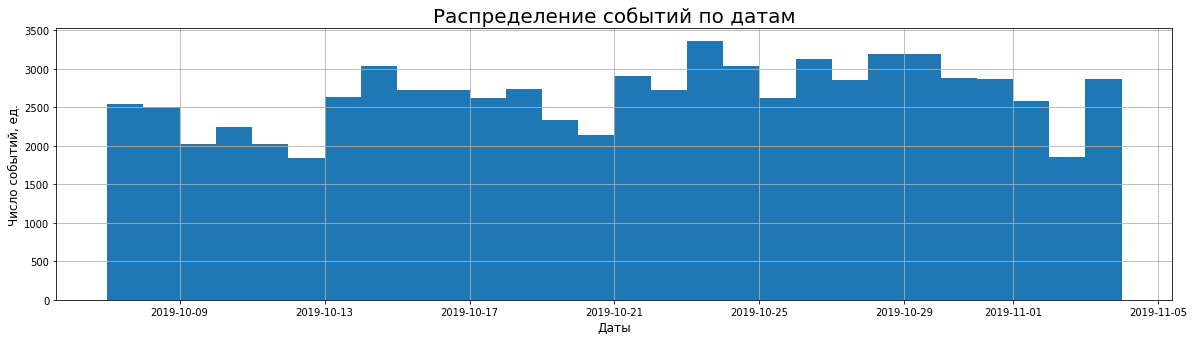

In [23]:
#смотрю распределение событий по датам
mobile_app['event_time'].hist(bins = 28, figsize = (20, 5))
plt.title('Распределение событий по датам', fontsize = 20)
plt.xlabel('Даты', fontsize=12)
plt.ylabel('Число событий, ед.', fontsize=12)
plt.show()

**Вывод:** Данный график показывает, сколько различных событий по дням совершали пользователи приложения. Пользователи достаточно стабильны, нельзя говорить о силных перепадах в данных. На графике ожидаемо видно, что по выходным пользователи совершают меньше действий, видны пики по количеству событий - 14 октября и 23 октября.

### Общая активность пользователей, расчет метрик DAU, WAU

In [24]:
#считаю показатели DAU, WAU, предварительно выделяя в датафрейме новые столбцы из дат 
mobile_app['session_year']  = mobile_app['event_time'].dt.year
mobile_app['session_month'] = mobile_app['event_time'].astype('datetime64[M]')
mobile_app['session_week']  = mobile_app['event_time'].astype('datetime64[W]')
mobile_app['session_date'] = mobile_app['event_time'].dt.date
mobile_app

dau_total = mobile_app.groupby('session_date').agg({'user_id': 'nunique'}).mean()
wau_total = (mobile_app.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'}).mean())

print('DAU средний =', int(dau_total))
print('WAU средний =', int(wau_total))

DAU средний = 279
WAU средний = 1139


Из почти 4300 пользователей ежедневную активность в среднем показывают примерно 279 человек, а еженедельную - 1139, то есть четверть от общего числа.

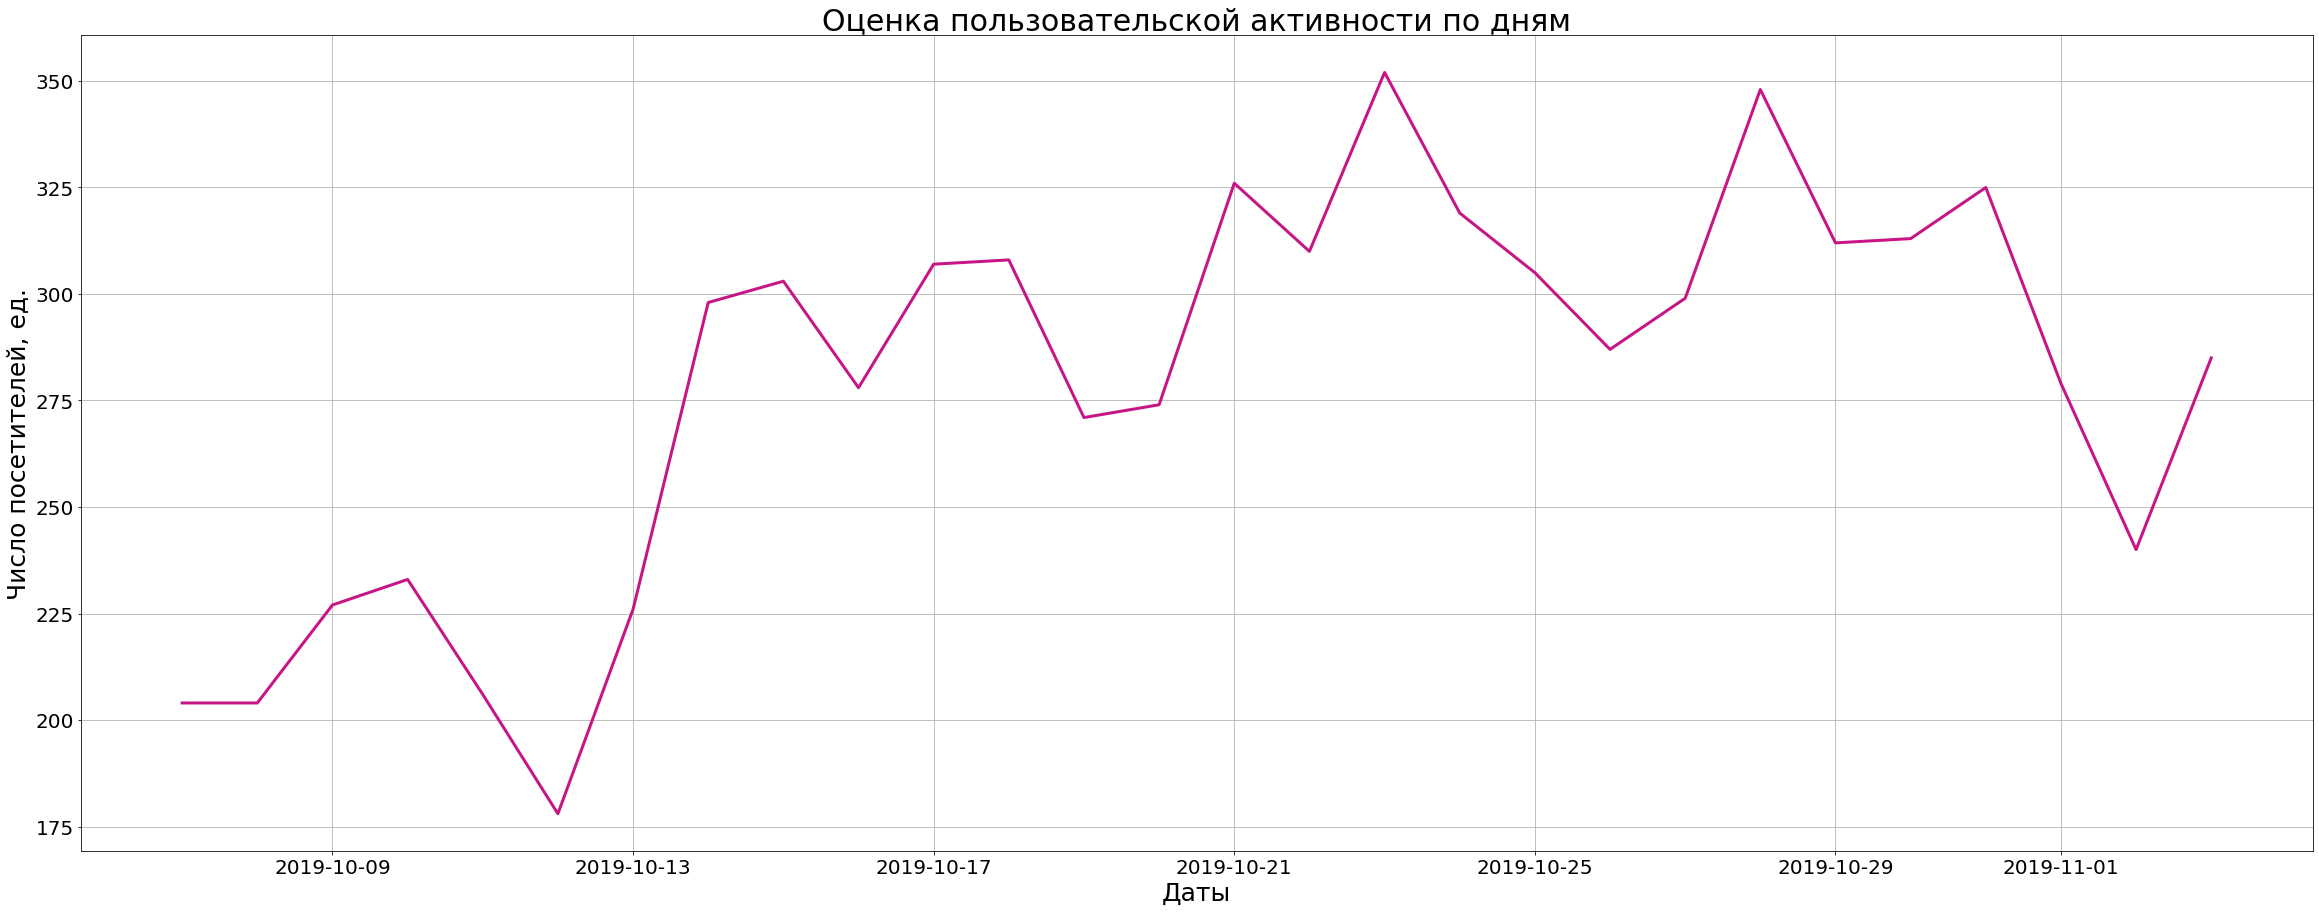

In [25]:
#визуализирую среднее число уникальных посетителей в день
dau = mobile_app.groupby('session_date').agg({'user_id': 'nunique'}).reset_index()
dau.plot(figsize = (40, 15), legend = None, x = 'session_date', grid = True, color = '#C71585', linewidth = 3)
plt.title('Оценка пользовательской активности по дням', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Даты', fontsize=25)
plt.ylabel('Число посетителей, ед.', fontsize=25)
plt.show()

Есть два пика посещаемости приложения пользователями - 23 октября и 28 октября, и есть два дня, где активность проседала - 12 октября и 2 ноября. Трудно говорить о том, чем обусловлены пики, но провалы, которые сильно отличаются от среднего можно списывать на сбои в работе приложения.

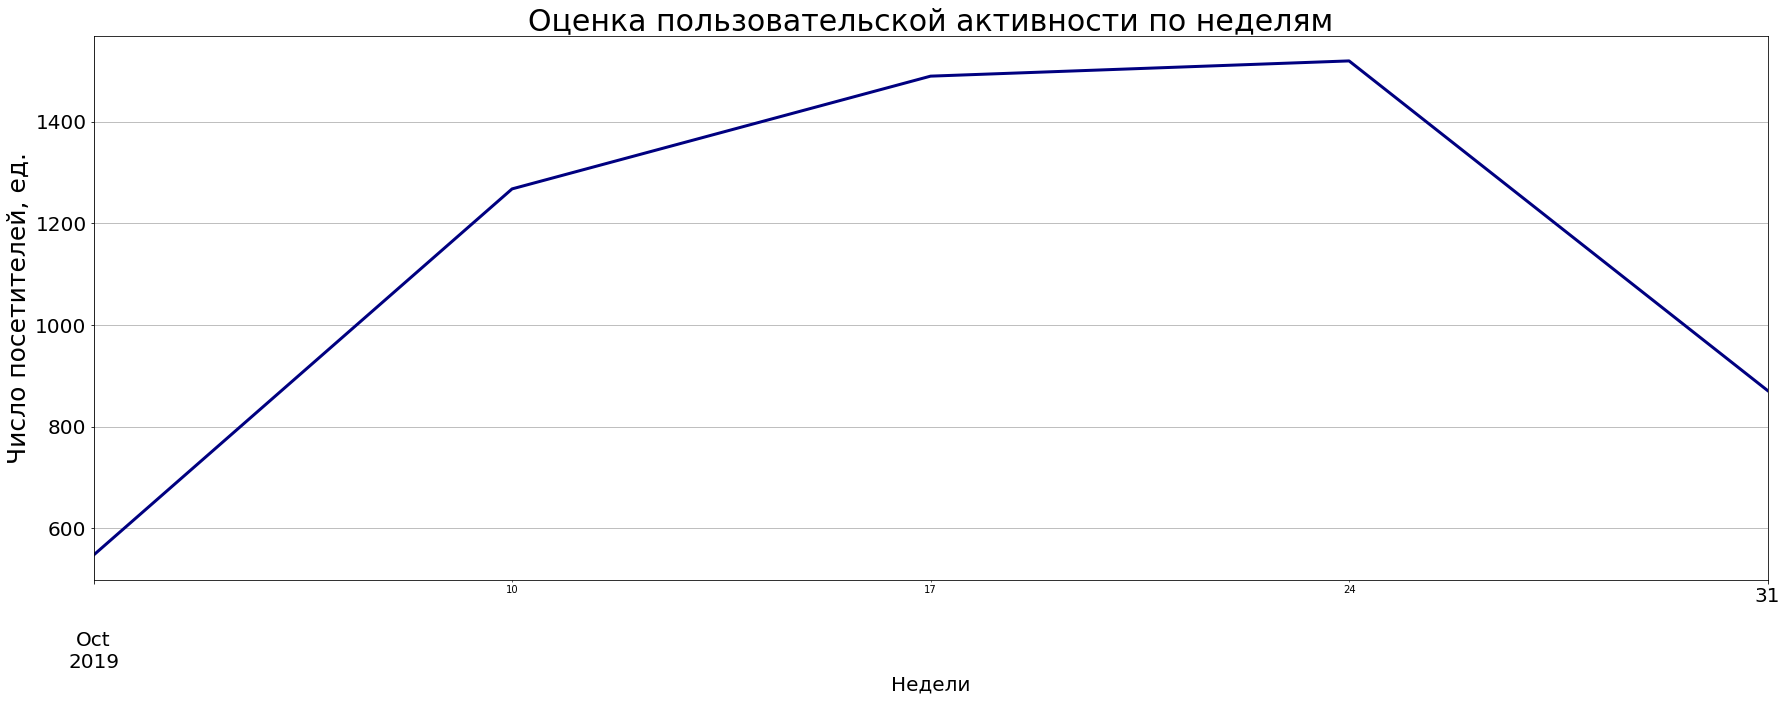

In [26]:
#визуализирую среднее число уникальных посетителей по неделям
wau = mobile_app.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'}).reset_index()
wau[['session_week', 'user_id']].plot(x='session_week', y='user_id', figsize=(30, 10), legend = None, \
                                      grid = True, color = '#000080', linewidth = 3)
plt.title('Оценка пользовательской активности по неделям', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Недели', fontsize=20)
plt.ylabel('Число посетителей, ед.', fontsize=25)
plt.show()

При оценке пользовательской активности по неделям можно отметить, что пик приходится на неделю с 17 по 24 октября, что подтверждает обнаруженный ранее факт с пиками 23 и 28 октября.

In [27]:
#посчитаю sticky фактор
sticky_wau = (dau_total / wau_total) * 100
print('Sticky Factor по отношению к недельной аудитории:', int(sticky_wau.round()), '%')

Sticky Factor по отношению к недельной аудитории: 25 %


Степень вовлеченности аудитории 25%. Как мы знаем чем выше вовлечённость пользователей, тем выше лояльность пользователей к нему. 25% на мой взгляд хороший показатель лояльности.

### Расчет средней пользовательской сессии в приложении

In [28]:
#создаю датафреймы с минимальным максимальным временем события для пользователей
min_time = mobile_app.groupby('user_id').agg({'event_time': 'min'}).reset_index()
max_time = mobile_app.groupby('user_id').agg({'event_time': 'max'}).reset_index()
min_time = min_time.rename(columns = {'event_time': 'min_event_time'})
max_time = max_time.rename(columns = {'event_time': 'max_event_time'})

In [29]:
#считаю длительность пользовательской сессии в секундах
user_duration = max_time.merge(min_time, on = 'user_id')
user_duration['session_duration'] = (user_duration['max_event_time'] - user_duration['min_event_time']).dt.seconds
user_duration

,user_id,max_event_time,min_event_time,session_duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-22 11:30:52,2019-10-07 13:39:45,78667
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-11-03 17:12:09,2019-10-19 21:34:33,70656
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 14:19:17,2019-11-01 13:54:35,1482
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-31 21:42:15,2019-10-18 22:14:05,84490
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-29 02:17:12,2019-10-25 16:44:41,34351
...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-26 19:53:51,2019-10-13 16:11:27,13344
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:33:42,2019-10-07 20:32:49,53
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:52:55,2019-10-23 11:51:35,80
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-28 07:17:52,2019-10-21 16:39:33,52699


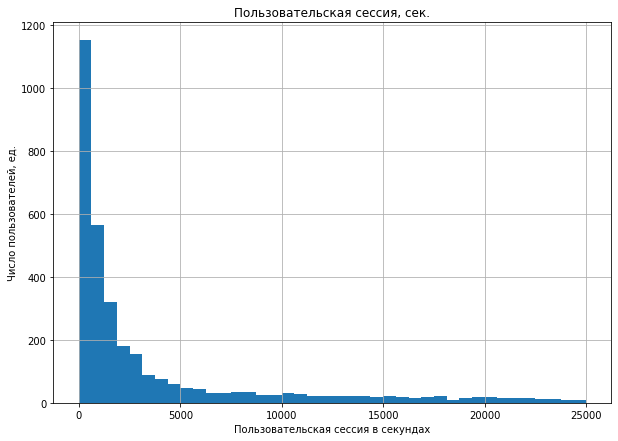

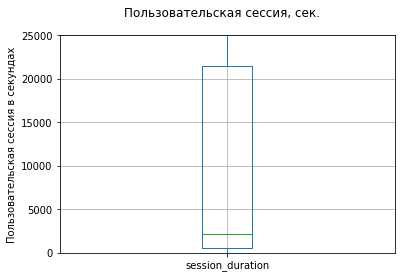

In [30]:
#строю визуализации пользовательских сессий
user_duration['session_duration'].hist(bins = 40, figsize = (10, 7), range = (0, 25000))
plt.title('Пользовательская сессия, сек.')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Пользовательская сессия в секундах', fontsize=10)
plt.ylabel('Число пользователей, ед.', fontsize=10)
plt.show()
plt.suptitle('Пользовательская сессия, сек.')
user_duration.boxplot(column = 'session_duration')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylabel('Пользовательская сессия в секундах', fontsize=10)
plt.ylim(0, 25000)
plt.show()

In [31]:
mobile_app = mobile_app.merge(user_duration, on = 'user_id')
mobile_app.head()

,event_time,event_name,user_id,source,session_year,session_month,session_week,session_date,max_event_time,min_event_time,session_duration
0,2019-10-07 00:00:00,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,2019-10-01,2019-10-03,2019-10-07,2019-10-07 00:18:42,2019-10-07,1122
1,2019-10-07 00:00:01,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,2019-10-01,2019-10-03,2019-10-07,2019-10-07 00:18:42,2019-10-07,1122
2,2019-10-07 00:00:07,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,2019-10-01,2019-10-03,2019-10-07,2019-10-07 00:18:42,2019-10-07,1122
3,2019-10-07 00:01:27,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,2019-10-01,2019-10-03,2019-10-07,2019-10-07 00:18:42,2019-10-07,1122
4,2019-10-07 00:01:34,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019,2019-10-01,2019-10-03,2019-10-07,2019-10-07 00:18:42,2019-10-07,1122


In [32]:
#считаю моду, чтоб посмотреть среднюю продолжительность пользовательской сессии, так как есть выбросы в данных
(mobile_app['session_duration'].mode()[0]/3600).round(2)

2.91

**Вывод:** В среднем пользователи, за период чуть меньше месяца, проводят в приложении около 3 часов - это довольно адекватный параметр для приложения, где люди продают и покупают вещи. Выбросы, которые достигают 24 часа, нельзя списать на сбои в приложении, так как это могут быть реальные пользователи с большим количеством проведенного времени за покупками или продажами своих товаров/вещей. 

Провела исследовательский анализ данных. Из почти 4300 пользователей ежедневную активность в среднем показывают примерно 279 человек, а еженедельную - 1139, то есть четверть от общего числа.

Посмотрела, как распределяется активность пользователей по дням и неделям, было отмечано, что на выходных приложением пользуются реже, чем на неделе. Были выявлены пиковые дни и недели активности: пик приходится на неделю с 17 по 24 октября, а дни - 23 и 28 октября.

## Сегментация пользователей на группы<a class="anchor" id="third-bullet"></a>

- Разбить пользователей на группы
- Провести когортный анализ
- Рассчитать Retention Rate
- Построить график распределения пользователей по времени, проведенному в приложении
- Посчитать конверсию в целевое действие - просмотр контактов для пользователей,
- Построить график распределения конверсий;
- Написать выводы по разделу.

### Расчет Retention Rate

In [33]:
#создаю датафрейм с дневными когортами, предварительно расчитав день активности пользователя, день первой активности и lifetime когорт
mobile_app['activity_day'] = mobile_app['event_time'].astype('datetime64[D]')
mobile_app['first_activity_day'] = mobile_app['min_event_time'].astype('datetime64[D]')
mobile_app['day_cohort_lifetime'] = (mobile_app['activity_day'] - mobile_app['first_activity_day'])
day_cohorts = mobile_app.groupby(['first_activity_day', 'day_cohort_lifetime']).agg({'user_id': 'nunique'})\
.reset_index()
day_cohorts = day_cohorts.rename(columns = {'user_id': 'user_cnt'})
day_cohorts

,first_activity_day,day_cohort_lifetime,user_cnt
0,2019-10-07,0 days,204
1,2019-10-07,1 days,37
2,2019-10-07,2 days,21
3,2019-10-07,3 days,22
4,2019-10-07,4 days,14
...,...,...,...
399,2019-11-01,1 days,15
400,2019-11-01,2 days,6
401,2019-11-02,0 days,97
402,2019-11-02,1 days,15


In [34]:
#создаю датафрейм с недельнымим когортами, предварительно расчитав неделю активности пользователя, неделю первой активности и lifetime когорт
mobile_app['activity_week'] = mobile_app['event_time'].astype('datetime64[W]')
mobile_app['first_activity_week'] = mobile_app['min_event_time'].astype('datetime64[W]')
mobile_app['week_cohort_lifetime'] = ((mobile_app['activity_week'] - mobile_app['first_activity_week'])\
                                      / np.timedelta64(1, 'W')).round().astype('int')
week_cohorts = mobile_app.groupby(['first_activity_week', 'week_cohort_lifetime']).agg({'user_id': 'nunique'})\
.reset_index()
week_cohorts = week_cohorts.rename(columns = {'user_id': 'user_cnt'})
week_cohorts

,first_activity_week,week_cohort_lifetime,user_cnt
0,2019-10-03,0,547
1,2019-10-03,1,148
2,2019-10-03,2,92
3,2019-10-03,3,60
4,2019-10-03,4,39
5,2019-10-10,0,1120
6,2019-10-10,1,262
7,2019-10-10,2,173
8,2019-10-10,3,79
9,2019-10-17,0,1136


In [35]:
#считаю число пользователей на нулевой месяц lifetime
initial_users_count = week_cohorts[week_cohorts['week_cohort_lifetime'] == 0][['first_activity_week', 'user_cnt']]
initial_users_count = initial_users_count.rename(columns={'user_cnt': 'week_cohort_users'})
initial_users_count

,first_activity_week,week_cohort_users
0,2019-10-03,547
5,2019-10-10,1120
9,2019-10-17,1136
12,2019-10-24,1014
14,2019-10-31,476


In [36]:
#объединяю созданные датафреймы для расчета Retention Rate
week_cohorts = week_cohorts.merge(initial_users_count, on = 'first_activity_week')
week_cohorts['retention'] = week_cohorts['user_cnt'] / week_cohorts['week_cohort_users']
week_cohorts

,first_activity_week,week_cohort_lifetime,user_cnt,week_cohort_users,retention
0,2019-10-03,0,547,547,1.000000
1,2019-10-03,1,148,547,0.270567
2,2019-10-03,2,92,547,0.168190
3,2019-10-03,3,60,547,0.109689
4,2019-10-03,4,39,547,0.071298
5,2019-10-10,0,1120,1120,1.000000
6,2019-10-10,1,262,1120,0.233929
7,2019-10-10,2,173,1120,0.154464
8,2019-10-10,3,79,1120,0.070536
9,2019-10-17,0,1136,1136,1.000000


In [37]:
#создаю сводную таблицу для построения тепловой карты 
retention_pivot = week_cohorts.pivot_table(index = 'first_activity_week', columns = 'week_cohort_lifetime', \
                                           values = 'retention', aggfunc = 'sum')
retention_pivot

week_cohort_lifetime,0,1,2,3,4
first_activity_week,,,,,
2019-10-03,1.0,0.270567,0.168190,0.109689,0.071298
2019-10-10,1.0,0.233929,0.154464,0.070536,NaN
2019-10-17,1.0,0.240317,0.088908,NaN,NaN
2019-10-24,1.0,0.173570,NaN,NaN,NaN
2019-10-31,1.0,NaN,NaN,NaN,NaN


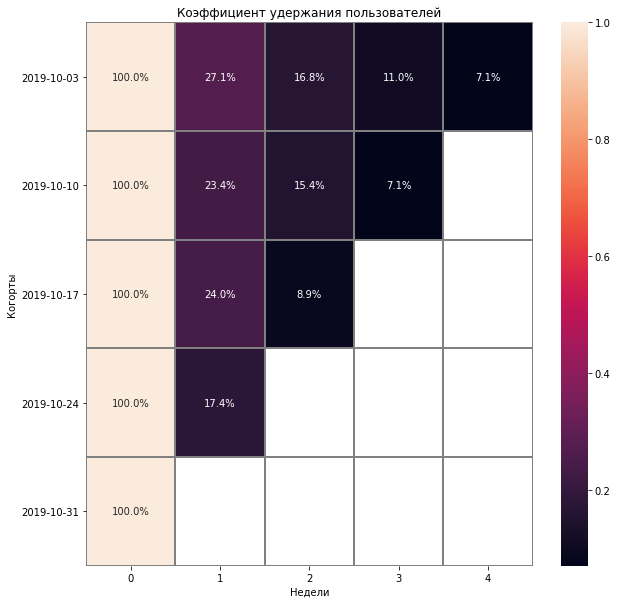

In [38]:
plt.figure(figsize = (10,10))
plt.title('Коэффициент удержания пользователей')
ax = sns.heatmap(retention_pivot, annot = True, fmt = '.1%', linewidths = 1, linecolor = 'grey')
plt.xlabel('Недели')
plt.ylabel('Когорты')
ax.set_yticklabels(retention_pivot.index.date)
plt.show()

In [39]:
#расчет среднего коэффициента удержания на вторую неделю жизни когорт
mean_retention_second_week = ((retention_pivot[1].mean())*100).round(2)
print('Средний коэффициент удержания на вторую неделю жизни когорт равен', mean_retention_second_week, '%')
mean_retention_third_week = ((retention_pivot[2].mean())*100).round(2)
print('Средний коэффициент удержания на третью неделю жизни когорт равен', mean_retention_third_week, '%')
mean_retention_forth_week = ((retention_pivot[3].mean())*100).round(2)
print('Средний коэффициент удержания на четвертую неделю жизни когорт равен', mean_retention_forth_week, '%')
mean_retention_fifth_week = ((retention_pivot[4].mean())*100).round(2)
print('Средний коэффициент удержания на пятую неделю жизни когорт равен', mean_retention_fifth_week, '%')

Средний коэффициент удержания на вторую неделю жизни когорт равен 22.96 %
Средний коэффициент удержания на третью неделю жизни когорт равен 13.72 %
Средний коэффициент удержания на четвертую неделю жизни когорт равен 9.01 %
Средний коэффициент удержания на пятую неделю жизни когорт равен 7.13 %


**Вывод:** Разделила прользователей на когорты по неделям начала использования приложения, рассчитала коэффициент удержания пользователей по недельным когортам и построила тепловую карту. Как видно на вторую неделю жизни когорт средний коэффициент удержания пользователей - примерно четверть - около 23%, а к концу наблюдений на четвертую и пятую неделю лояльными пользователшями осталось всего около 7%. Показатель кажется низким, хотя нужно учитывать специфику приложения:  скорее всего люди пользуются им не на постоянной основе, а время от времени (купив или продав вещи).

### Пользователи пришли в приложение из разных источников: Yandex, Google и Other, посмотрю и сравню метрики пользователей в этих группах.

In [40]:
#создаю датафрейм с недельнымим когортами для источника привлечения пользователей Google, используя ранее рассчитанные показатели
google_cohorts = mobile_app.query('source == "google"').groupby(['first_activity_week', 'week_cohort_lifetime'])\
.agg({'user_id': 'nunique'}).reset_index()
google_cohorts = google_cohorts.rename(columns = {'user_id': 'google_user_cnt'})
#далее повторяю все расчеты для retation rate, что были ранее

#считаю число пользователей на нулевой месяц lifetime
google_initial_users_count = google_cohorts[google_cohorts['week_cohort_lifetime'] == 0][['first_activity_week', \
                                                                                          'google_user_cnt']]
google_initial_users_count = google_initial_users_count.rename(columns={'google_user_cnt': 'google_cohort_users'})

#объединяю созданные датафреймы для расчета Retention Rate
google_cohorts = google_cohorts.merge(google_initial_users_count, on = 'first_activity_week')
google_cohorts['retention'] = google_cohorts['google_user_cnt'] / google_cohorts['google_cohort_users']

#создаю сводную таблицу для построения тепловой карты 
google_retention_pivot = google_cohorts.pivot_table(index = 'first_activity_week', columns = 'week_cohort_lifetime',\
                                                    values = 'retention', aggfunc = 'sum')
google_retention_pivot

week_cohort_lifetime,0,1,2,3,4
first_activity_week,,,,,
2019-10-03,1.0,0.253521,0.119718,0.112676,0.084507
2019-10-10,1.0,0.243056,0.145833,0.069444,NaN
2019-10-17,1.0,0.226300,0.079511,NaN,NaN
2019-10-24,1.0,0.174797,NaN,NaN,NaN
2019-10-31,1.0,NaN,NaN,NaN,NaN


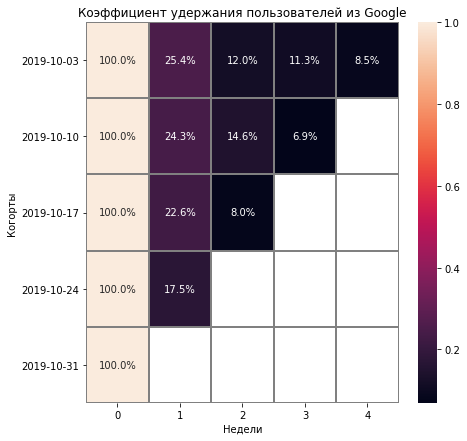

In [41]:
plt.figure(figsize = (7,7))
plt.title('Коэффициент удержания пользователей из Google')
ax = sns.heatmap(google_retention_pivot, annot = True, fmt = '.1%', linewidths = 1, linecolor = 'grey')
plt.xlabel('Недели')
plt.ylabel('Когорты')
ax.set_yticklabels(google_retention_pivot.index.date)
plt.show()

In [42]:
#расчет среднего коэффициента удержания на вторую неделю жизни когорт для источника Google
mean_google_retention_second_week = ((google_retention_pivot[1].mean())*100).round(2)
print('Средний коэффициент удержания на вторую неделю жизни когорт источника Google равен', mean_google_retention_second_week,\
      '%')
mean_google_retention_third_week = ((google_retention_pivot[2].mean())*100).round(2)
print('Средний коэффициент удержания на третью неделю жизни когорт источника Google равен', mean_google_retention_third_week,\
      '%')
mean_google_retention_forth_week = ((google_retention_pivot[3].mean())*100).round(2)
print('Средний коэффициент удержания на четвертую неделю жизни когорт источника Google равен', mean_google_retention_forth_week,\
      '%')
mean_google_retention_fifth_week = ((google_retention_pivot[4].mean())*100).round(2)
print('Средний коэффициент удержания на пятую неделю жизни когорт источника Google равен', mean_google_retention_fifth_week,\
      '%')

Средний коэффициент удержания на вторую неделю жизни когорт источника Google равен 22.44 %
Средний коэффициент удержания на третью неделю жизни когорт источника Google равен 11.5 %
Средний коэффициент удержания на четвертую неделю жизни когорт источника Google равен 9.11 %
Средний коэффициент удержания на пятую неделю жизни когорт источника Google равен 8.45 %


**Yandex - аналогичный анализ проведем для Яндекс**

In [43]:
#аналогичный анализ проведем для Яндекс
#создаю датафрейм с недельнымим когортами для источника привлечения пользователей Yandex, используя ранее рассчитанные показатели
yandex_cohorts = mobile_app.query('source == "yandex"').groupby(['first_activity_week', 'week_cohort_lifetime'])\
.agg({'user_id': 'nunique'}).reset_index()
yandex_cohorts = yandex_cohorts.rename(columns = {'user_id': 'yandex_user_cnt'})
#далее повторяю все расчеты для retation rate, что были ранее

#считаю число пользователей на нулевой месяц lifetime
yandex_initial_users_count = yandex_cohorts[yandex_cohorts['week_cohort_lifetime'] == 0][['first_activity_week', \
                                                                                          'yandex_user_cnt']]
yandex_initial_users_count = yandex_initial_users_count.rename(columns={'yandex_user_cnt': 'yandex_cohort_users'})

#объединяю созданные датафреймы для расчета Retention Rate
yandex_cohorts = yandex_cohorts.merge(yandex_initial_users_count, on = 'first_activity_week')
yandex_cohorts['retention'] = yandex_cohorts['yandex_user_cnt'] / yandex_cohorts['yandex_cohort_users']

#создаю сводную таблицу для построения тепловой карты 
yandex_retention_pivot = yandex_cohorts.pivot_table(index = 'first_activity_week', columns = 'week_cohort_lifetime',\
                                                    values = 'retention', aggfunc = 'sum')
yandex_retention_pivot

week_cohort_lifetime,0,1,2,3,4
first_activity_week,,,,,
2019-10-03,1.0,0.275304,0.165992,0.093117,0.05668
2019-10-10,1.0,0.237452,0.150579,0.067568,NaN
2019-10-17,1.0,0.236473,0.078156,NaN,NaN
2019-10-24,1.0,0.158009,NaN,NaN,NaN
2019-10-31,1.0,NaN,NaN,NaN,NaN


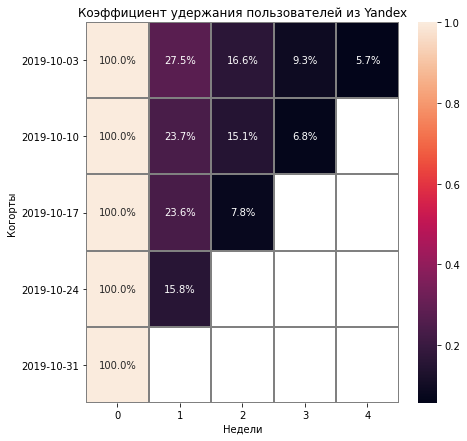

In [44]:
plt.figure(figsize = (7,7))
plt.title('Коэффициент удержания пользователей из Yandex')
ax = sns.heatmap(yandex_retention_pivot, annot = True, fmt = '.1%', linewidths = 1, linecolor = 'grey')
plt.xlabel('Недели')
plt.ylabel('Когорты')
ax.set_yticklabels(yandex_retention_pivot.index.date)
plt.show()

In [45]:
#расчет среднего коэффициента удержания на вторую неделю жизни когорт для источника Google
mean_yandex_retention_second_week = ((yandex_retention_pivot[1].mean())*100).round(2)
print('Средний коэффициент удержания на вторую неделю жизни когорт источника Yandex равен', mean_yandex_retention_second_week,\
      '%')
mean_yandex_retention_third_week = ((yandex_retention_pivot[2].mean())*100).round(2)
print('Средний коэффициент удержания на третью неделю жизни когорт источника Yandex равен', mean_yandex_retention_third_week,\
      '%')
mean_yandex_retention_forth_week = ((yandex_retention_pivot[3].mean())*100).round(2)
print('Средний коэффициент удержания на четвертую неделю жизни когорт источника Yandex равен', mean_yandex_retention_forth_week,\
      '%')
mean_yandex_retention_fifth_week = ((yandex_retention_pivot[4].mean())*100).round(2)
print('Средний коэффициент удержания на пятую неделю жизни когорт источника Yandex равен', mean_yandex_retention_fifth_week,\
      '%')

Средний коэффициент удержания на вторую неделю жизни когорт источника Yandex равен 22.68 %
Средний коэффициент удержания на третью неделю жизни когорт источника Yandex равен 13.16 %
Средний коэффициент удержания на четвертую неделю жизни когорт источника Yandex равен 8.03 %
Средний коэффициент удержания на пятую неделю жизни когорт источника Yandex равен 5.67 %


**Other - аналогичный анализ проведем для источника Other**

In [46]:
#создаю датафрейм с недельнымим когортами для источника привлечения пользователей Other, используя ранее рассчитанные показатели
other_cohorts = mobile_app.query('source == "other"').groupby(['first_activity_week', 'week_cohort_lifetime'])\
.agg({'user_id': 'nunique'}).reset_index()
other_cohorts = other_cohorts.rename(columns = {'user_id': 'other_user_cnt'})
#далее повторяю все расчеты для retation rate, что были ранее

#считаю число пользователей на нулевой месяц lifetime
other_initial_users_count = other_cohorts[other_cohorts['week_cohort_lifetime'] == 0][['first_activity_week', \
                                                                                          'other_user_cnt']]
other_initial_users_count = other_initial_users_count.rename(columns={'other_user_cnt': 'other_cohort_users'})

#объединяю созданные датафреймы для расчета Retention Rate
other_cohorts = other_cohorts.merge(other_initial_users_count, on = 'first_activity_week')
other_cohorts['retention'] = other_cohorts['other_user_cnt'] / other_cohorts['other_cohort_users']

#создаю сводную таблицу для построения тепловой карты 
other_retention_pivot = other_cohorts.pivot_table(index = 'first_activity_week', columns = 'week_cohort_lifetime',\
                                                    values = 'retention', aggfunc = 'sum')
other_retention_pivot

week_cohort_lifetime,0,1,2,3,4
first_activity_week,,,,,
2019-10-03,1.0,0.278481,0.215190,0.132911,0.082278
2019-10-10,1.0,0.219745,0.168790,0.076433,NaN
2019-10-17,1.0,0.261290,0.116129,NaN,NaN
2019-10-24,1.0,0.196078,NaN,NaN,NaN
2019-10-31,1.0,NaN,NaN,NaN,NaN


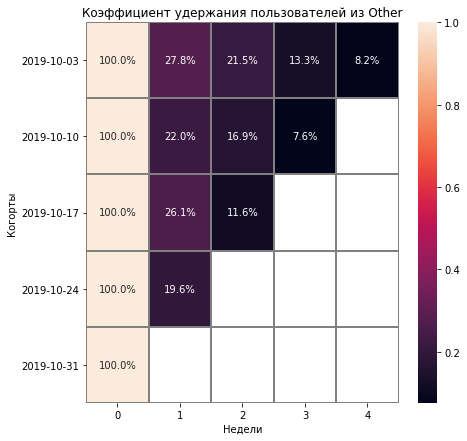

In [47]:
plt.figure(figsize = (7,7))
plt.title('Коэффициент удержания пользователей из Other')
ax = sns.heatmap(other_retention_pivot, annot = True, fmt = '.1%', linewidths = 1, linecolor = 'grey')
plt.xlabel('Недели')
plt.ylabel('Когорты')
ax.set_yticklabels(other_retention_pivot.index.date)
plt.show()

In [48]:
#расчет среднего коэффициента удержания на вторую неделю жизни когорт для источника Google
mean_other_retention_second_week = ((other_retention_pivot[1].mean())*100).round(2)
print('Средний коэффициент удержания на вторую неделю жизни когорт источника Other равен', mean_other_retention_second_week,\
      '%')
mean_other_retention_third_week = ((other_retention_pivot[2].mean())*100).round(2)
print('Средний коэффициент удержания на третью неделю жизни когорт источника Other равен', mean_other_retention_third_week,\
      '%')
mean_other_retention_forth_week = ((other_retention_pivot[3].mean())*100).round(2)
print('Средний коэффициент удержания на четвертую неделю жизни когорт источника Other равен', mean_other_retention_forth_week,\
      '%')
mean_other_retention_fifth_week = ((other_retention_pivot[4].mean())*100).round(2)
print('Средний коэффициент удержания на пятую неделю жизни когорт источника Other равен', mean_other_retention_fifth_week,\
      '%')

Средний коэффициент удержания на вторую неделю жизни когорт источника Other равен 23.89 %
Средний коэффициент удержания на третью неделю жизни когорт источника Other равен 16.67 %
Средний коэффициент удержания на четвертую неделю жизни когорт источника Other равен 10.47 %
Средний коэффициент удержания на пятую неделю жизни когорт источника Other равен 8.23 %


**Вывод:** визуализации и расчеты позволяют говорить о том, что коэффициент удержания пользователей, скачавших приложение из разных источников, примерно одинаковый, но чуть лучше смотрится источник Other. Можно сделать предварительный вывод о том, что источник, откуда пришли пользователи, не особо влияет на поведение пользователей в приложении.

### Время, проведенное в приложении

In [49]:
#строю датасет с группировкой по источникам, чтоб посчитать среднюю пользовательскую сессию для групп пользователей
source_duration = mobile_app.groupby(['source', 'user_id']).agg({'session_duration': 'first'}).reset_index()
source_duration

,source,user_id,session_duration
0,google,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,84490
1,google,00653802-5ff1-4071-bc17-347fc4cef569,511
2,google,00a93a72-3bbc-4ee7-8a81-7134f45ae009,770
3,google,00af35c4-2045-4960-96b8-7fd5f1978a88,358
4,google,01147bf8-cd48-49c0-a5af-3f6eb45f8262,4148
...,...,...,...
4288,yandex,ff5c152c-bd63-4797-8fa2-29987199e76d,1049
4289,yandex,ff82c7c7-16d6-44b1-833b-a217747b0b02,76714
4290,yandex,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,13344
4291,yandex,ffc01466-fdb1-4460-ae94-e800f52eb136,53


In [50]:
source_users_session = source_duration.groupby('source').agg({'user_id': 'count', 'session_duration': 'median'}).reset_index()
source_users_session

,source,user_id,session_duration
0,google,1129,2453.0
1,other,1230,2192.0
2,yandex,1934,2094.5


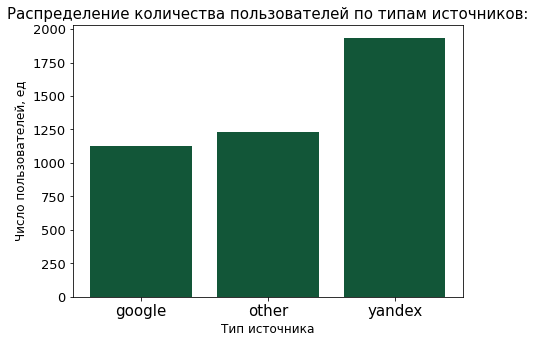

In [51]:
plt.figure(figsize=(7,5))
plt.bar(source_users_session['source'], source_users_session['user_id'], color = '#125638') 
plt.title('Распределение количества пользователей по типам источников:', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.xlabel('Тип источника', fontsize=12)
plt.ylabel('Число пользователей, ед', fontsize=12)
plt.show()

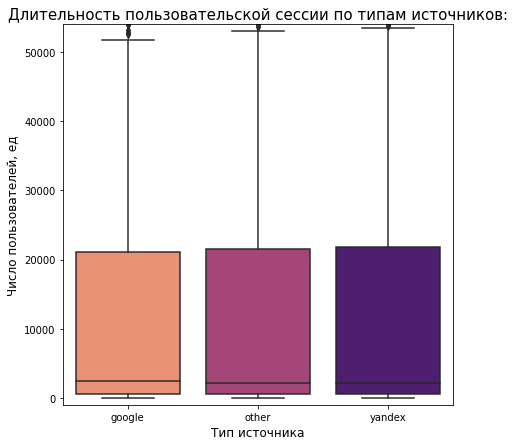

In [52]:
plt.figure(figsize = (7, 7))
ax = sns.boxplot(x = "source", y = "session_duration", data = source_duration, palette = "magma_r")
ax.set_ylim([-1000, 54000])
plt.title('Длительность пользовательской сессии по типам источников:', fontsize=15)
plt.xlabel('Тип источника', fontsize=12)
plt.ylabel('Число пользователей, ед', fontsize=12)
plt.show()

**Вывод:** средняя пользовательская сессия наибольшая у тех, кто скачал приложение из Google - около 41 минуты, далее идут остальные источники - 36,5 минут и потом пользователи, скачавшие приложение из Яндекса - почти 35 минут. Также стоит отметить, что наибольшее число пользователей скачало мобильное приложение именно из Яндекса. Также видно, что длительность пользовательской сессии по типам источников, откуда пользователи скачали приложение, примерно одинаковая.

### Частота действий

In [53]:
#считаю количество действий для каждого источника по типам событий 
freq = mobile_app.groupby(['source', 'event_name']).agg({'user_id': 'count'}).reset_index().\
rename(columns = {'user_id': 'user_cnt'})
freq.head()

,source,event_name,user_cnt
0,google,advert_open,1621
1,google,contacts_call,163
2,google,contacts_show,1440
3,google,favorites_add,415
4,google,map,1028


In [54]:
freq_pivot = mobile_app.pivot_table(index = 'source', columns = 'event_name', values = 'user_id', aggfunc = 'count')
freq_pivot

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search,tips_click,tips_show
source,,,,,,,,,
google,1621,163,1440,415,1028,3466,2144,190,9978
other,1918,152,1054,259,910,2862,1958,228,10125
yandex,2625,226,2035,743,1943,3684,2682,396,19952


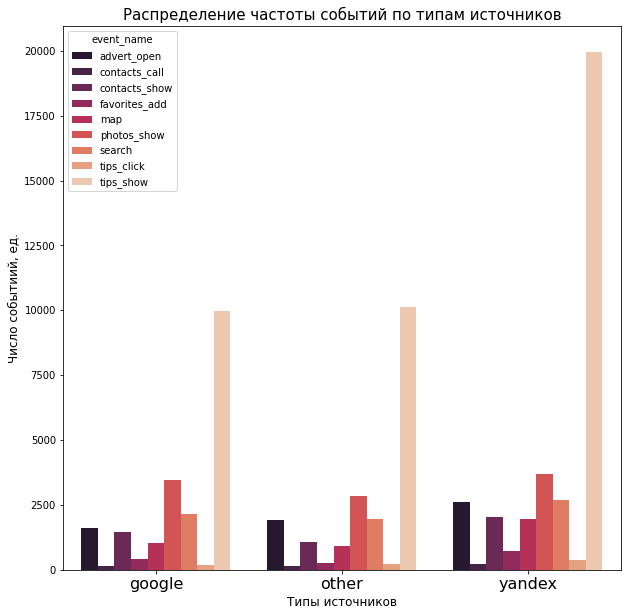

In [55]:
plt.figure(figsize = (10, 10))
sns.barplot(data=freq, x='source', y='user_cnt', hue='event_name', palette = "rocket")
plt.title('Распределение частоты событий по типам источников', fontsize = 15)
plt.xlabel('Типы источников', fontsize = 12)
plt.ylabel('Число событиий, ед.', fontsize = 12)
plt.xticks(fontsize = 16)
plt.show()

Как видно на графике видно что по типу событий просмотра рекомендованных объявлений сильно выбиваются пользователи из Яндекс, но, так как изначально количество пользователей было различное, видится разумным построить такой же график только разбив события на доли от общего числа по каждому источнику и проанализировать эти результаты.

In [56]:
#считаю общее число событий для каждого источника
google_events = mobile_app.query('source == "google"')['event_name'].count()
other_events = mobile_app.query('source == "other"')['event_name'].count()
yandex_events = mobile_app.query('source == "yandex"')['event_name'].count()

print('Общее число событий для источника Google:', google_events)
print('Общее число событий для источника Other:', other_events)
print('Общее число событий для источника Yandex:', yandex_events)

Общее число событий для источника Google: 20445
Общее число событий для источника Other: 19466
Общее число событий для источника Yandex: 34286


In [57]:
#посчитаю доли каждого события, предварительно создав столбец с общим числом событий для каждого источника
def event_count(source):
    if source == "google":
        return google_events
    elif source == "yandex":
        return yandex_events
    else:
        return other_events

freq['event_count'] = freq['source'].apply(event_count)
freq.head()

,source,event_name,user_cnt,event_count
0,google,advert_open,1621,20445
1,google,contacts_call,163,20445
2,google,contacts_show,1440,20445
3,google,favorites_add,415,20445
4,google,map,1028,20445


In [58]:
freq['fraction'] = (freq['user_cnt'] / freq['event_count']).round(2)
freq.head()

,source,event_name,user_cnt,event_count,fraction
0,google,advert_open,1621,20445,0.08
1,google,contacts_call,163,20445,0.01
2,google,contacts_show,1440,20445,0.07
3,google,favorites_add,415,20445,0.02
4,google,map,1028,20445,0.05


In [59]:
freq_fraction = freq.pivot_table(index = 'source', columns = 'event_name', values = 'fraction',\
                                           aggfunc = 'first')
freq_fraction

event_name,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search,tips_click,tips_show
source,,,,,,,,,
google,0.08,0.01,0.07,0.02,0.05,0.17,0.10,0.01,0.49
other,0.10,0.01,0.05,0.01,0.05,0.15,0.10,0.01,0.52
yandex,0.08,0.01,0.06,0.02,0.06,0.11,0.08,0.01,0.58


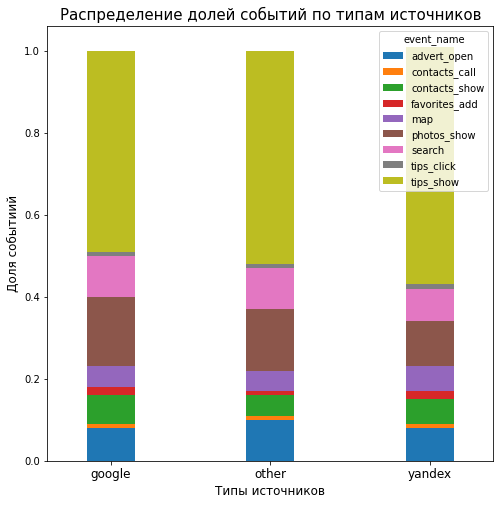

In [60]:
freq_fraction.plot(kind = 'bar', stacked = True, rot = 0, figsize = (8, 8), width =0.3)
plt.title('Распределение долей событий по типам источников', fontsize = 15)
plt.xlabel('Типы источников', fontsize = 12)
plt.ylabel('Доля событиий', fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

**Вывод:** Самое популярное действие для всех пользователей - просмотр рекомендованных объявлений, для источников Гугл и остальных это действие составляет 49-52% от всех действий, у Яндекса - 58%. Также к популярным событиям можно отнести открытие карточки объявления, просмотр фотографий в объявлении и поиск по сайту. Этот анализ также показывает, что поведение пользователей из разным источников примерно одинаковое.

### Конверсия в целевое действие

In [61]:
#считаю общее число пользователей для каждого источника
google_users = mobile_app.query('source == "google"')['user_id'].nunique()
other_users = mobile_app.query('source == "other"')['user_id'].nunique()
yandex_users = mobile_app.query('source == "yandex"')['user_id'].nunique()

print('Общее число пользователей для источника Google:', google_users)
print('Общее число пользователей для источника Other:', other_users)
print('Общее число пользователей для источника Yandex:', yandex_users)

Общее число пользователей для источника Google: 1129
Общее число пользователей для источника Other: 1230
Общее число пользователей для источника Yandex: 1934


In [62]:
conversion = mobile_app.query('event_name == "contacts_show"').groupby('source').agg({'user_id': 'nunique'}).reset_index()
conversion = conversion.rename(columns = {'user_id': 'user_contacts_show'})

#функция для добавления столбца с уникальными пользователями по источникам 
def unique_users(source):
    if source == "google":
        return google_users
    elif source == "yandex":
        return yandex_users
    else:
        return other_users

conversion['unique_users'] = conversion['source'].apply(unique_users)             
conversion['conversion_to_contacts'] = (conversion['user_contacts_show'] / conversion['unique_users']).round(3)
conversion = conversion.sort_values(by = 'conversion_to_contacts', ascending = False)
conversion      

,source,user_contacts_show,unique_users,conversion_to_contacts
2,yandex,478,1934,0.247
0,google,275,1129,0.244
1,other,228,1230,0.185


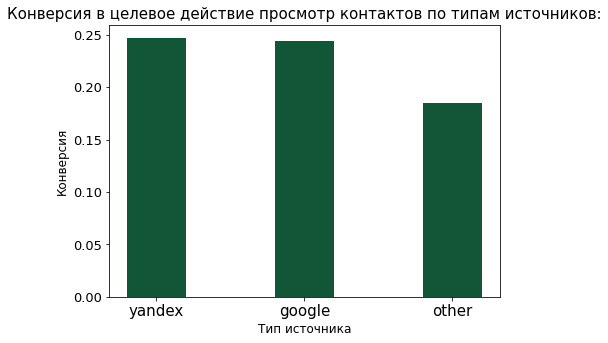

In [63]:
plt.figure(figsize=(7,5))
plt.bar(conversion['source'], conversion['conversion_to_contacts'], color = '#125638', width = 0.4) 
plt.title('Конверсия в целевое действие просмотр контактов по типам источников:', fontsize=15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.xlabel('Тип источника', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.show()  

**Вывод:** У Яндекс и Гугл конверсия в целевое действие - просмотр телефона от общего числа установивших приложение почти одинаковая - порядка 24% пользователей, то есть примерно четверть всех пользователей открывает номера телефонов в объявлении, а у других источников конверсия ниже - 18,5%.

**Вывод по разделу:**  проанализировала поведение пользователей из трех групп: тех, кто установил приложение из Google, Yandex и из других источников (Other). Посмотрела распределение числа уникальных пользователей: наибольшее число пользователей характерно для Яндекс-группы, в то время как Гугл и другие источники друг с другом сопоставимы ко количеству пользователей. 
Метрики для этих групп: 

1) Retention Rate - коэффициент удержания пользователей. Получилась примерно одинаковая картина: на вторую неделю жизни когорт коэффициент удержания 22-23%, на третью неделю коэффициент удержания больше всего у других источников - около 16,5% против 11 Гугла и 13 Яндекса, на четвертую показатели примерно одинаковые - 8-10%, на пятой недели у Гугла и других источников остается порядка 8 процента изначальных пользователей, у Яндекс - около 5,5%. В целом нельзя говорить о значительных различиях по источникам установки приложения.

2) Время проведенное в приложении. В среднем пользователи, привлеченные из разных источников, показывают схожее время длительности нахождения в приложении - средняя пользовательская сессия наибольшая у тех, кто скачал приложение из Google - около 41 минуты, далее идут остальные источники - 36,5 минут и потом пользователи, скачавшие приложение из Яндекса - почти 35 минут. В целом, время не принципиально отличается друг от друга, пользователи проводят в приложении порядка 35-40 минут, отсутствие различий в пользовательских сессиях приведено также на визуализациях.

3) Частота действий. Самое популярное действие для всех пользователей - просмотр рекомендованных объявлений, для источников Гугл и остальных это действие составляет 49-52% от всех действий, у Яндекса - 58%. Также к популярным событиям можно отнести открытие карточки объявления, просмотр фотографий в объявлении и поиск по сайту. Этот анализ так же показывает, что поведение пользователей из разным источников плюс-минус одинаковое.

4) Конверсия в целевое действие. В этом разделе была посчитала конверсия изначально установивших приложение пользователей в целевое действие - просмотр номера телефона в объявлении, у Яндекс и Гугл конверсия почти одинаковая - порядка 24% пользователей, то есть примерно четверть всех пользователей открывает номепра телефонов в объявлении, а у других источников конверсия ниже - 18,5%.

## Проверка статистических гипотез<a class="anchor" id="fourth-bullet"></a>
- Разделить пользователей на группы: установившие приложение из google, установившие приложение из yandex;
- Проверить гипотезу: две эти группы пользователей демонстрируют разную конверсию в просмотры контактов;
- Сформулировать и проверить собственную гипотезу;
- Написать выводы по разделу.

### Провека гипотезы о равенстве конверсий
Проверю гипотезу о равенстве конверсий в целевое событие - просмотр контактов для пользователей, установивших приложение из Google и Yandex.

Рассчитаю статистическую значимость различий в конверсиях между группами и проверю гипотезы:

H0 - нулевая гипотеза о том, что статистически значимых различий в конверсиях между группами пользователей нет

H1 - альтернативная гипотеза о том, что есть статистические различия между конверсиями групп пользователей

Критический уровень статистической значимости задам равный 0.05, исходя из общепринятых пороговых значений. При увеличении статистической значимости увеличивается критическая область, при попадании в которую, отвергаем нулевую гипотезу. Мы увеличим вероятность попасть в эту область, из-за этого увеличится число ложных срабатываний - увеличится вероятность ошибки первого рода.

In [64]:
google_yandex_conv = conversion.query('source == "google" or source == "yandex"')
google_yandex_conv

,source,user_contacts_show,unique_users,conversion_to_contacts
2,yandex,478,1934,0.247
0,google,275,1129,0.244


In [65]:
alpha = 0.05  

event_users = np.array([google_yandex_conv.query('source == "google"')['user_contacts_show'], \
                        google_yandex_conv.query('source == "yandex"')['user_contacts_show']])
total_users = np.array([google_yandex_conv.query('source == "google"')['unique_users'], \
                        google_yandex_conv.query('source == "yandex"')['unique_users']])


#конверсия для обеих групп
p1 = event_users[0]/total_users[0]
p2 = event_users[1]/total_users[1]
#в комбинированном
p_combined = (event_users[0] + event_users[1]) / (total_users[0] + total_users[1])
#разница конверсий в датасетах
difference = p1 - p2
#считаю статистику в стандартных отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * \
                                    (1 / total_users[0] + 1 / total_users[1]))

#задаю стандартное нормальное распределение со средним 0 и стандартным отклонением 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями групп есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии в группах разными')

p-значение:  [0.8244316]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии в группах разными


**Вывод:** Проверка статистической гипотезы подтвердила, что нет оснований считать конверсии в целевое действие пользователей групп Google и Yandex разными

### Формулировка и проверка собственной гипотезы
Гипотезы:

H0 - среднее время пользовательской сессии для групп Google и Yandex равно

H1 - среднее время пользовательской сессии для групп Google и Yandex различается

Критический уровень статистической значимости 0.05, исходя из общепринятых пороговых значений

In [66]:
alpha = 0.05 
results = st.ttest_ind(source_duration.query('source == "google"')['session_duration'], source_duration.query('source == "yandex"')['session_duration'], equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5983626313569959
Не получилось отвергнуть нулевую гипотезу


Результат статтеста подтверждает предыдущие выводы о том, что длительность пользовательских сессий не сильно различается по источникам

## Общие выводы<a class="anchor" id="fifth-bullet"></a>

В данном исследовании был проведен анализ пользовательский активности пользователей мобильного приложения "Ненужные вещи".
Перед началом исследования данные были подготовлены к анализу, пропусков и дубликатов не было выявлено.

Исследовала пользовательскую активность: Я трасполагала данными почти за месяц, из почти 4300 пользователей ежедневную активность в среднем показывают примерно 279 человек, а еженедельную - 1139, то есть четверть от общего числа. В среднем пользователи за рассматриваемый период проводят в приложении около 3 часов - думаю, это довольно-таки адекватный параметр для приложения, где люди продают и покупают вещи. Есть выбросы до пользовательский сессии в 24 часа - то есть некоторые пользователи проводят около часа в приложении ежедневно, я не думаю, что эти выбросы можно считать ошибкой в данных, нельзя исключать, что некоторые пользователи могут что-то активно искать и отслеживать в приложении, или продаватьт многие свои вещи.

Посмотрела, как распределяется активность пользователей по дням и неделям, было отмечано, что на выходных приложением пользуются реже, нежели в будни. Были выявлены пиковые дни и недели активности: пик приходится на неделю с 17 по 24 октября, а по дням - 23 и 28 октября. Выявить какую-то тенденцию трудно.

Разделила прользователей на когорты по неделям начала использования приложения, рассчитала коэффициент удержания пользователей по недельным когортам и построила тепловую карту, на вторую неделю жизни когорт средний коэффициент удержания пользователей - примерно четверть - около 23%, а к концу наблюдений на четвертую и пятую неделю лояльными пользователшями осталось всего около 7%. Думаю, это не очень высокий показатель, хотя нужно учитывать специфику приложения: оно создано для покупки и продажи вещей, скорее всего люди пользуются им не на постоянной основе, а время от времени.

Далее я провела анализ метрик для пользователей из трех групп: установивших приложение из Google, Yandex и из других источников (Other). Посмотрела распределение числа уникальных пользователей: наибольшее число пользователей характерно для Яндекс-группы, в то время как Гугл и другие источники друг с другом сопоставимы ко количеству пользователей. Посчитала для этих групп метрики:

- **Retention Rate** - коэффициент удержания пользователей. По источникам выстроилась примерно одинаковая картина: на вторую неделю жизни когорт коэффициент удержания 22-23%, на третью неделю коэффициент удержания больше всего у других источников - около 16,5% против 11 Гугла и 13 Яндекса, на четвертую показатели примерно одинаковые - 8-10%, на пятой недели у Гугла и других источников остается порядка 8 процента изначальных пользователей, у Яндекс - около 5,5%. В целом нельзя говорить о значительных различиях по источникам установки приложения.

- **Время проведенное в приложении.** В среднем пользователи, привлеченные из разных источников, показывают схожее время длительности нахождения в приложении - средняя пользовательская сессия наибольшая у тех, кто скачал приложение из Google - около 41 минуты, далее идут остальные источники - 36,5 минут и потом пользователи, скачавшие приложение из Яндекса - почти 35 минут. В целом6 время не принципиально отличается друг от друга, пользователи проводят в приложении порядка 35-40 минут, отсутствие различий в пользовательских сессиях приведено также на визуализациях.

- **Частота действий.** Самое популярное действие для всех пользователей - просмотр рекомендованных объявлений, для источников Гугл и остальных это действие составляет 49-52% от всех действий, у Яндекса - 58%. Также к популярным событиям можно отнести открытие карточки объявления, просмотр фотографий в объявлении и поиск по сайту. Этот анализ так же показывает, что поведение пользователей из разным источников плюс=минус одинаковое.

- **Конверсия в целевое действие.** В этом разделе была посчитала конверсия изначально установивших приложение пользователей в целевое действие - просмотр номера телефона в объявлении, у Яндекс и Гугл конверсия почти одинаковая - порядка 24% пользователей, то есть примерно четверть всех пользователей открывает номепра телефонов в объявлении, а у других источников конверсия ниже - 18,5%.

Далее были проверены статистические гипотезы: 
- **Гипотезу о равенстве конверсий в целевое событие** - просмотр контактов для пользователей, установивших приложение из Google и Yandex.

Проверка статистической гипотезы подствердила, что нет оснований считать конверсии в целевое действие пользователей групп Google и Yandex разными

- **Проверила стат тестом гипотезу о равенстве среднего времени пользовательской сессии для групп Google и Yandex**
Не получилось отвергнуть нулевую гипотезу о равенстве среднего времени пользовательской сессии, результат статтеста подтверждает предыдущие выводы о том, что длительность пользовательских сессий не сильно различается по источникам.

**Рекомендации** Можно отметить, что не было выявлено строгих закономерностей и различий групп пользователей, установивших приложение "Ненужные вещи" из различных источников. Пользователи, пришедшие из разных источников показывают примерно одинаковое поведение.

Рекомендуется продолжать работать над привлечением пользователей в приложение и над повышением удержания пользователей в приложении. Стоит работать над совершенствованием персонализированных рекомендаций для пользователей, отслеживать поисковые запросы в приложении, формировать портрет пользователя и настраивать индивидуальные рекомендации. 

### Презентация
https://drive.google.com/file/d/1XRM0w4Xy_dgyHGTUFap3qqmJ71OoXXVM/view?usp=sharing

### Дашборд в Tableau
https://public.tableau.com/views/final_dash_16651456805890/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link